<a href="https://colab.research.google.com/github/Avinash-reddy-2004/nlp-ad-/blob/main/AD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
sent="Ram is studying at Malla Reddy University in Hyderabad, India"

In [ ]:
import nltk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

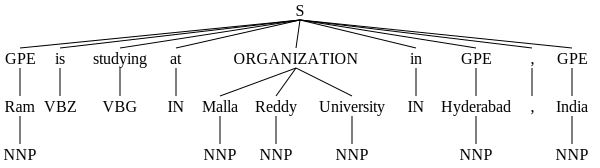

In [ ]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk.pos_tag(word_tokenize(sent)),binary=False)

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(u'Apple is ready to launch new phone worth $1000 in New york time square')
for ent in doc.ents:
  print(ent.text,ent.start_char,ent.end_char,ent.label_)

Apple 0 5 ORG
1000 42 46 MONEY
New york 50 58 GPE


In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
text="""
Elon Musk, the CEO of Spacex and Tesla, announced that SpaceX's Starship will be launching its first crewed mission to Mars in 2027.
The mission, which will involve astronauts from NASA, will be the first of its kind, and it will take place at the Kennedy Space Center in Florida.
Musk emphasized that the project would push the boundaries of space exploration."""

In [ ]:
doc=nlp(text)
for ent in doc.ents:
  print(f"Entity:{ent.text},Label{ent.label_}")

Entity:Elon Musk,LabelPERSON
Entity:Spacex,LabelGPE
Entity:Tesla,LabelORG
Entity:first,LabelORDINAL
Entity:Mars,LabelLOC
Entity:2027,LabelDATE
Entity:NASA,LabelORG
Entity:first,LabelORDINAL
Entity:the Kennedy Space Center,LabelFAC
Entity:Florida,LabelGPE


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Reviews3.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [ ]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [ ]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text']=df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text']=df['Text'].str.replace('[^\w\s]','')
stop=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text']=df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text']=df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labelled lumbo halted peanuts....
2,"connection around centuries. light, pillow cit..."
3,looking secret ingredient robitussin believe f...
4,great staff great price. wide assortment mummy...


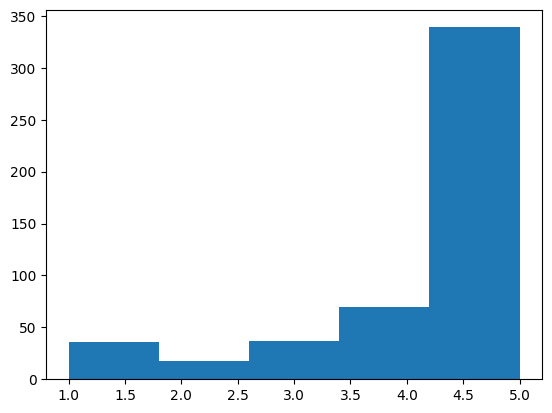

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [ ]:
reviews = df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5, grid=False)
plt.show()
print(reviews.groupby('Score')['Id'].count())

In [ ]:
score_1 = reviews[reviews['Score'] == 1].sample(n=min(47, len(reviews[reviews['Score'] == 1])), replace=True, random_state=1)
score_2 = reviews[reviews['Score'] == 2].sample(n=min(47, len(reviews[reviews['Score'] == 2])), replace=True, random_state=1)
score_3 = reviews[reviews['Score'] == 3].sample(n=min(47, len(reviews[reviews['Score'] == 3])), replace=True, random_state=1)
score_4 = reviews[reviews['Score'] == 4].sample(n=min(47, len(reviews[reviews['Score'] == 4])), replace=True, random_state=1)
score_5 = reviews[reviews['Score'] == 5].sample(n=min(47, len(reviews[reviews['Score'] == 5])), replace=True, random_state=1)

In [ ]:
reviews_sample=pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    36
2    18
3    37
4    47
5    47
Name: Id, dtype: int64


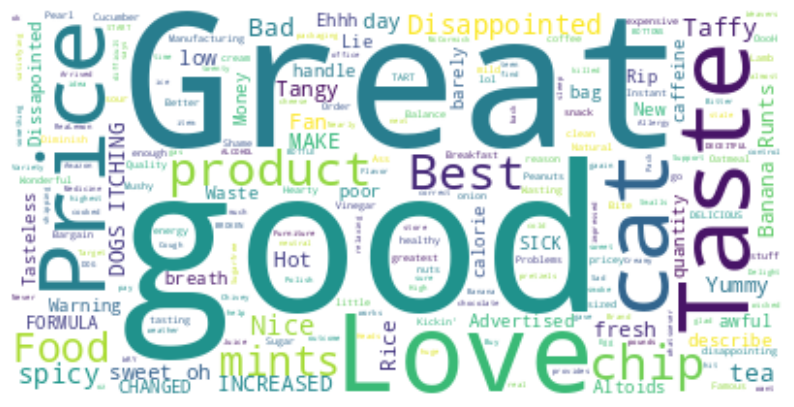

In [ ]:
from wordcloud import WordCloud
reviews_str=" ".join(reviews_sample["Summary"].to_numpy())
wordcloud=WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
negative_reviews=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews=reviews_sample[reviews_sample['Score'].isin([4,5])]
negative_reviews_str=negative_reviews.Summary.str.cat()
positive_reviews_str=positive_reviews.Summary.str.cat()

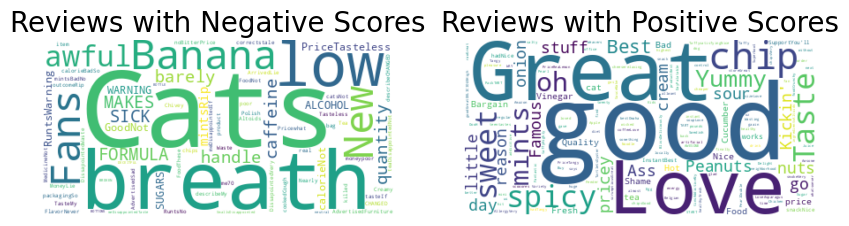

In [ ]:
from wordcloud import WordCloud

wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(1, 2, 1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
ax1.set_title('Reviews with Negative Scores', fontsize=20)

ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
ax2.set_title('Reviews with Positive Scores', fontsize=20)
plt.show()

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp=sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs= analyzer.polarity_scores(row)
    emptyline.append(vs)

In [ ]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


from matplotlib import pyplot as plt
_df_0['neg'].plot(kind='hist', bins=20, title='neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['neu'].plot(kind='hist', bins=20, title='neu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pos'].plot(kind='hist', bins=20, title='pos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['compound'].plot(kind='hist', bins=20, title='compound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='neg', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='neu', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='pos', y='compound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['neg'].plot(kind='line', figsize=(8, 4), title='neg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['neu'].plot(kind='line', figsize=(8, 4), title='neu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['pos'].plot(kind='line', figsize=(8, 4), title='pos')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['compound'].plot(kind='line', figsize=(8, 4), title='compound')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_c=pd.concat([df.reset_index(drop=True),df_sentiments],axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880
